<h1 style="text-align: center;"><a title="Data Science-AIMS-Cmr-2021-22"> Vizualizing Time Series</h1>

# 1. Introduction

Time series lends itself naturally to visualization. Line plots of observations over time are
popular, but there is a suite of other plots that you can use to learn more about your problem.
The more you learn about your data, the more likely you are to develop a better forecasting
model. In this tutorial, you will discover 6 dierent types of plots that you can use to visualize
time series data with Python. Specically, after completing this session, you will know:
    
* How to explore the temporal structure of time series with line plots, lag plots, and
autocorrelation plots.


* How to understand the distribution of observations using histograms and density plots.
* How to tease out the change in distribution over intervals using box and whisker plots
and heat map plots.
Let's get started.

Visualization plays an important role in time series analysis and forecasting. Plots of the raw
sample data can provide valuable diagnostics to identify temporal structures like trends, cycles,
and seasonality that can in
uence the choice of model. A problem is that many novices in the
eld of time series forecasting stop with line plots. In this tutorial, we will take a look at 6
dierent types of visualizations that you can use on your own time series data. They are:
1. Line Plots.
2. Histograms and Density Plots.
3. Box and Whisker Plots.
4. Heat Maps.
5. Lag Plots or Scatter Plots.
6. Autocorrelation Plots.
The focus is on univariate time series, but the techniques are just as applicable to multivariate
time series, when you have more than one observation at each time step. Next, let's take a look
at the dataset we will use to demonstrate time series visualization in this tutorial.

# 2. Line Plot


The first, and perhaps most popular, visualization for time series is the line plot. In this plot,
time is shown on the x-axis with observation values along the y-axis. Below is an example of
visualizing the Pandas Series of the Minimum Daily Temperatures dataset directly as a line
plot.

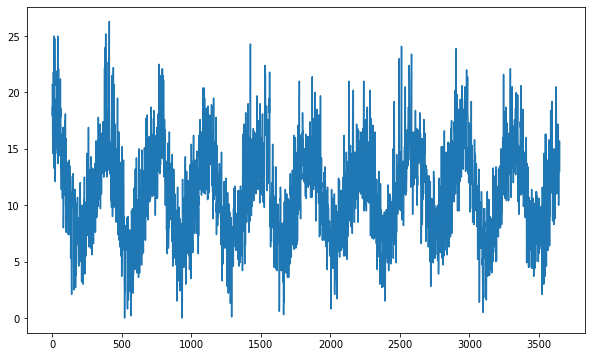

In [1]:
# create a line plot
import matplotlib.pyplot as plt
import  pandas as pd
url = 'https://raw.githubusercontent.com/rock-feller/Datasets_for_Education/main/data_02/daily-min-temperatures.csv'
df = pd.read_csv(url , parse_dates=True, squeeze=True)
plt.figure(figsize=(10 , 6))
plt.plot(df['Temp'])

The line plot is quite dense. Sometimes it can help to change the style of the line plot; for
example, to use a dashed line or dots. Below is an example of changing the style of the line to
be black dots instead of a connected line (the style='k.' argument). We could change this
example to use a dashed line by setting style to be 'k--'.

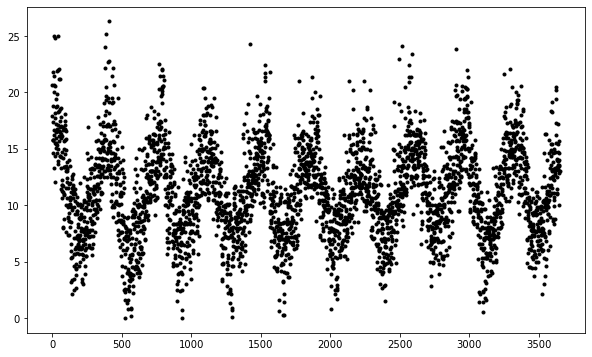

In [2]:
# create a dot plot
plt.figure(figsize=(10 , 6))
plt.plot(df['Temp'], 'k.')

Running the example recreates the same line plot with dots instead of the connected line.

It can be helpful to compare line plots for the same interval, such as from day-to-day,
month-to-month, and year-to-year. The Minimum Daily Temperatures dataset spans 10
years. We can group data by year and create a line plot for each year for direct compari-
son. The example below shows how to do this. First the observations are grouped by year
(series.groupby(Grouper(freq='A'))).
The groups are then enumerated and the observations for each year are stored as columns
in a new DataFrame. Finally, a plot of this contrived DataFrame is created with each column
visualized as a subplot with legends removed to cut back on the clutter.

In [11]:
colors1 =['b', 'g', 'r', 'c', 'm', 'y' ,  
          'aqua' , 'antiquewhite' , 'cornflowerblue'  , 
          'forestgreen'  , 'mediumslateblue'   ,'tan']
len(colors1)

12

In [3]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [4]:
df

,Date,Temp,year,month,day
0,1981-01-01,20.7,1981,1,1
1,1981-01-02,17.9,1981,1,2
2,1981-01-03,18.8,1981,1,3
3,1981-01-04,14.6,1981,1,4
4,1981-01-05,15.8,1981,1,5
...,...,...,...,...,...
3645,1990-12-27,14.0,1990,12,27
3646,1990-12-28,13.6,1990,12,28
3647,1990-12-29,13.5,1990,12,29
3648,1990-12-30,15.7,1990,12,30


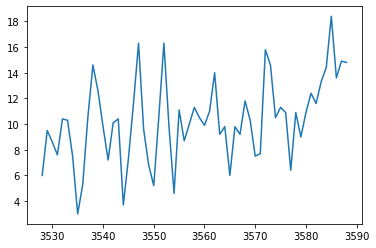

In [7]:
df_Jan90 = df[(df['year'] ==1990)  & ((df['month'] == 10) | (df['month'] == 9) )]
plt.plot(df_Jan90['Temp'])

In [12]:
def YearPlots(year):
    plt.figure(figsize=(14, 10))
    plt.title('Monthly Temperature ')
    labels = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 
          'Jun' , 'Jul' , 'Aug' , 'Sept' , 'Oct' , 'Nov' , 'Dec']
    df_year = df[ df['year'] == year ]
    for month in range(1, 13):
    
        plt.subplot(3, 4, month)
        plt.plot(df_year[df_year['month'] == month]['Temp']  , colors1[month-1])
        plt.xlabel(labels[month-1])
        #return 

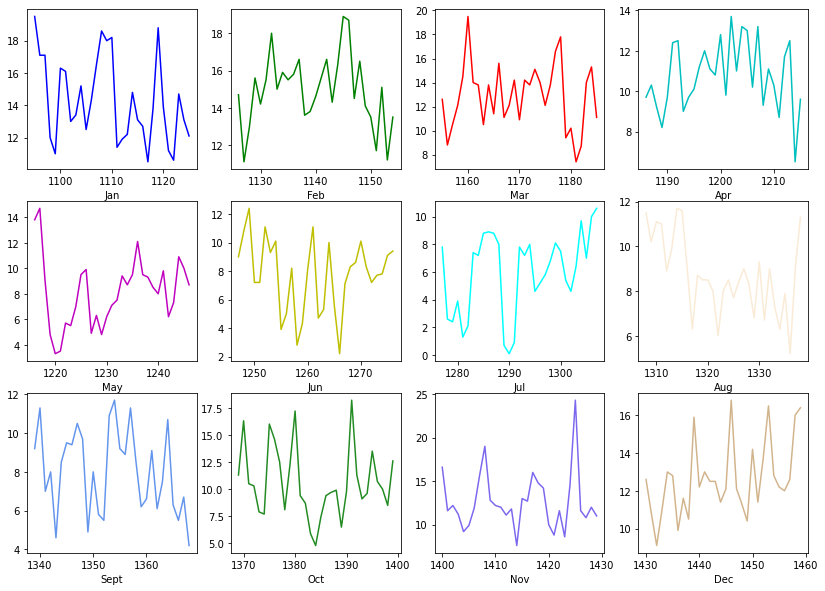

In [13]:
YearPlots(1984)

# 3. Histogram and Density Plots

Another important visualization is of the distribution of observations themselves. This means a
plot of the values without the temporal ordering. Some linear time series forecasting methods
assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution).
This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide
a useful first check of the distribution of observations both on raw observations and after any
type of data transform has been performed.
The example below creates a histogram plot of the observations in the Minimum Daily
Temperatures dataset. A histogram groups values into bins, and the frequency or count of
observations in each bin can provide insight into the underlying distribution of the observations.

(array([ 53., 181., 564., 862., 830., 670., 347., 102.,  32.,   9.]),
 array([ 0.  ,  2.63,  5.26,  7.89, 10.52, 13.15, 15.78, 18.41, 21.04,
        23.67, 26.3 ]),
 <a list of 10 Patch objects>)

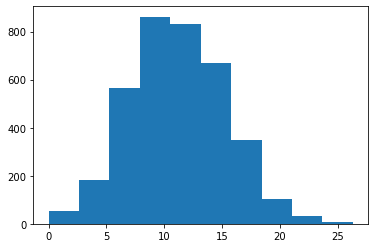

In [32]:
# create a histogram plot

plt.hist(df['Temp'])

In [14]:
def YearPlotsHist(year):
    plt.figure(figsize=(14, 10))
    plt.title('Monthly Temperature ')
    labels = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 
          'Jun' , 'Jul' , 'Aug' , 'Sept' , 'Oct' , 'Nov' , 'Dec']
    df_year = df[ df['year'] == year ]
    for month in range(1, 13):
    
        plt.subplot(3, 4, month)
        plt.hist(df_year[df_year['month'] == month]['Temp']  , color=colors1[month-1])
        plt.xlabel(labels[month-1])

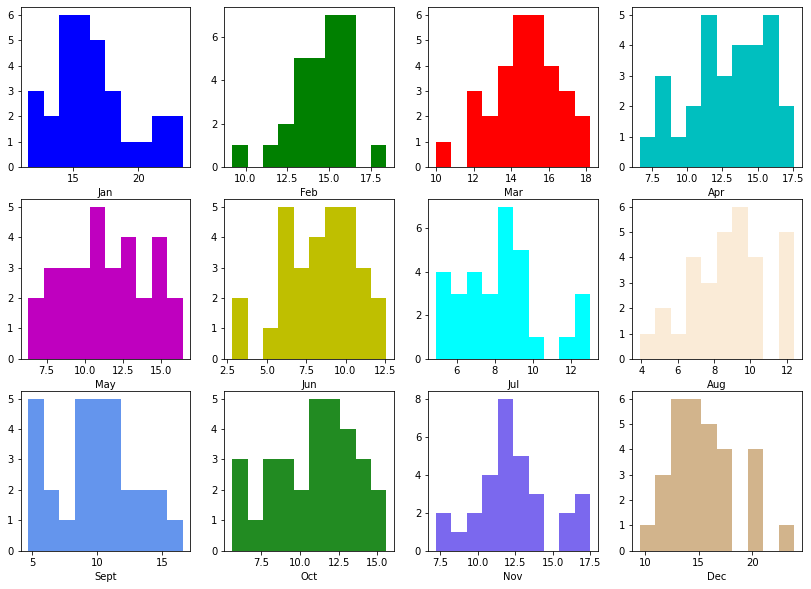

In [15]:
YearPlotsHist(1988)

Running the example shows a distribution that looks strongly Gaussian. The plotting
function automatically selects the size of the bins based on the spread of values in the data.

We can get a better idea of the shape of the distribution of observations by using a density
plot. This is like the histogram, except a function is used to fit the distribution of observations
and a nice, smooth line is used to summarize this distribution. Below is an example of a density
plot of the Minimum Daily Temperatures dataset.

In [16]:
import seaborn as sns

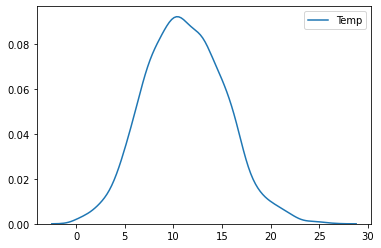

In [17]:
# create a density plot
sns.kdeplot(df['Temp'])


In [18]:
def YearPlotsKDEHist(year):
    plt.figure(figsize=(14, 10))
    plt.title('Monthly Temperature ')
    labels = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 
          'Jun' , 'Jul' , 'Aug' , 'Sept' , 'Oct' , 'Nov' , 'Dec']
    df_year = df[ df['year'] == year ]
    for month in range(1, 13):
    
        plt.subplot(3, 4, month)
        sns.kdeplot(df_year[df_year['month'] == month]['Temp']  , color=colors1[month-1])
        plt.xlabel(labels[month-1])

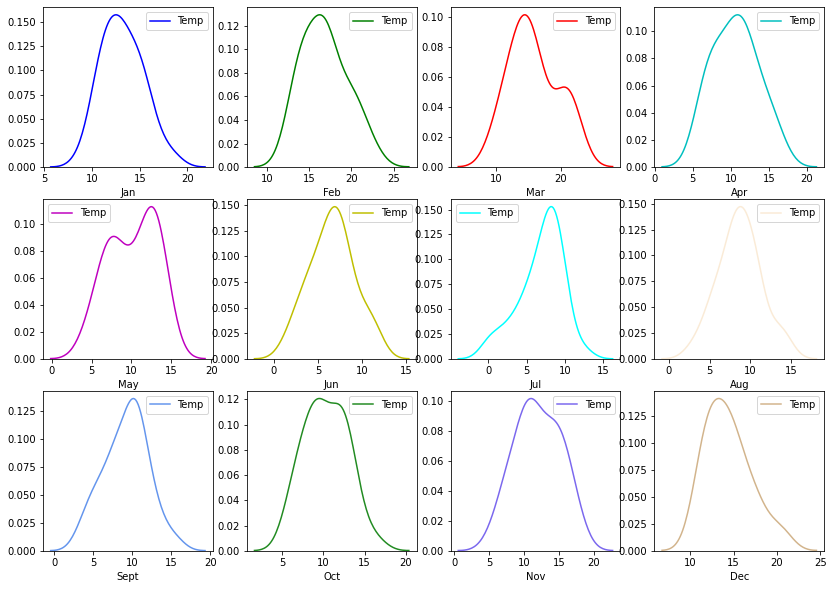

In [19]:
YearPlotsKDEHist(1983)

Running the example creates a plot that provides a clearer summary of the distribution of
observations. We can see that perhaps the distribution is a little asymmetrical and perhaps a
little pointy to be Gaussian. Seeing a distribution like this may suggest later exploring statistical
hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation
techniques to reshape the distribution, like the Box-Cox transform.

## Monthly Average Plots

In [20]:
def MontlyAvg(year):
    import random
    df_year = df[ df['year'] == year ]
    
    monthly_avg = []
    for month in range(1, 13):
        monthly_avg.append(df_year[ df_year['month'] == month]['Temp'].mean())
    position = [1,2,3,4,5,6,7,8,9,10,11,12]
    labels = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' ,
          'Aug' , 'Sept' , 'Oct' , 'Nov' , 'Dec']
    plt.figure(figsize=(15 , 6))
    plt.xticks(position, labels)
    plt.plot( position, monthly_avg  , lw = 2, ms = 10  , marker = 'o' , color = random.choice(colors1))
    sns.regplot(position, monthly_avg )
    plt.xlabel('Month of the year ' +  str(year))
    plt.ylabel('Average of Temperature')
    plt.title('Monthly Average of Temperature')
    plt.grid()
    return plt.show()

In [25]:
def MinTemps(year):
    import random
    df_year = df[ df['year'] == year ]
    
    monthly_avg = []
    for month in range(1, 13):
        monthly_avg.append(df_year[ df_year['month'] == month]['Temp'].min())
    position = [1,2,3,4,5,6,7,8,9,10,11,12]
    labels = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' ,
          'Aug' , 'Sept' , 'Oct' , 'Nov' , 'Dec']
    plt.figure(figsize=(15 , 6))
    plt.xticks(position, labels)
    plt.plot( position, monthly_avg  , lw = 2, ms = 10  , marker = 'o' , color = random.choice(colors1))
    sns.regplot(position, monthly_avg )
    plt.xlabel('Month of the year ' +  str(year))
    plt.ylabel('Average of Temperature')
    plt.title('Monthly Average of Temperature')
    plt.grid()
    return plt.show()

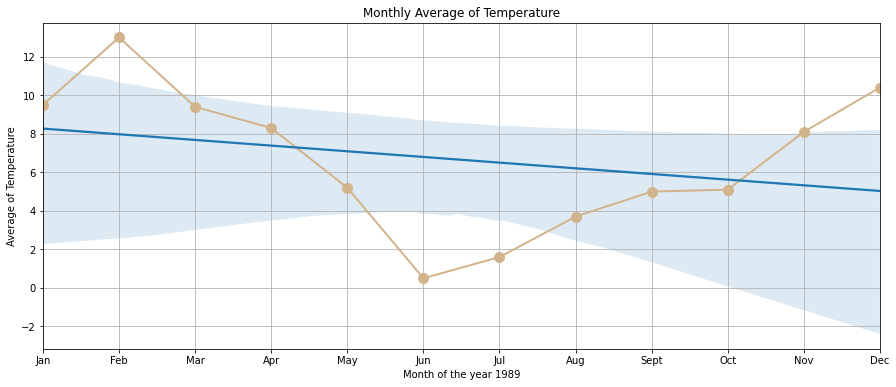

In [26]:
MinTemps(1989)

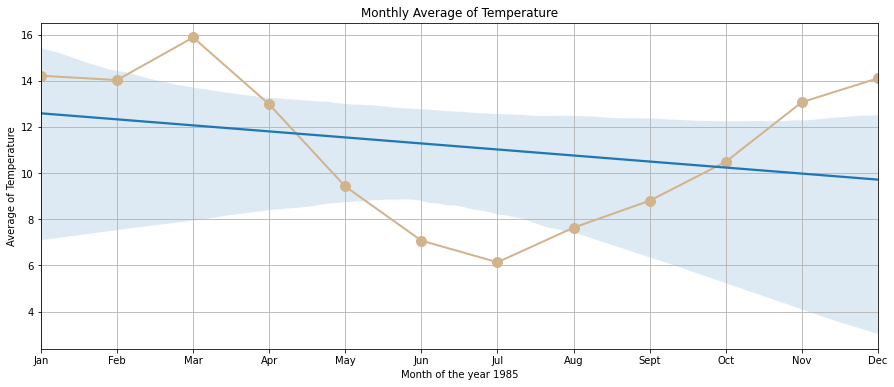

In [23]:
MontlyAvg(1985)

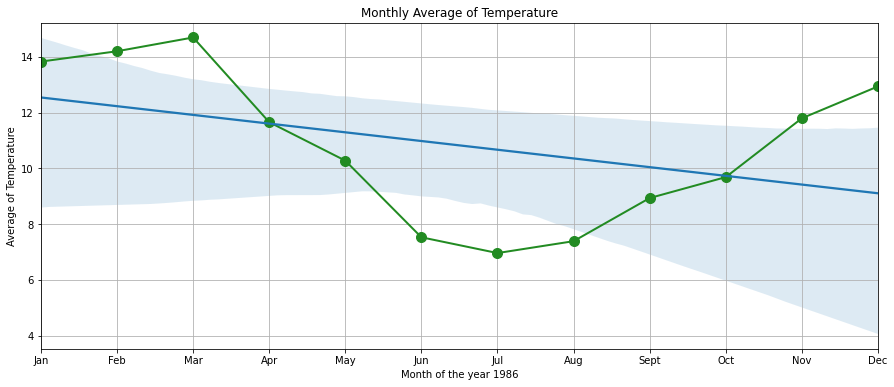

In [24]:
MontlyAvg(1986)

# 4. Box and Whisker Plots by Interval

Histograms and density plots provide insight into the distribution of all observations, but we
may be interested in the distribution of values by time interval. Another type of plot that is
useful to summarize the distribution of observations is the box and whisker plot. This plot
draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of
observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above
and below the box to summarize the general extents of the observations. Dots are drawn for
outliers outside the whiskers or extents of the data.

Box and whisker plots can be created and compared for each interval in a time series, such
as years, months, or days. Below is an example of grouping the Minimum Daily Temperatures
dataset by years, as was done above in the plot example. A box and whisker plot is then created
for each year and lined up side-by-side for direct comparison.

{'whiskers': [<matplotlib.lines.Line2D at 0x11c7dc280>,
 'caps': [<matplotlib.lines.Line2D at 0x11c7dc940>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c790ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x11c7e8040>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c7e8340>],
 'means': []}

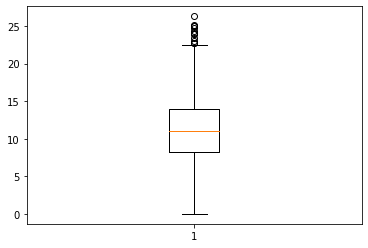

In [45]:
# create a boxplot of yearly data
plt.boxplot(df['Temp'])

In [48]:
def YearPlotsBoxPlot(year):
    plt.figure(figsize=(14, 10))
    plt.title('Monthly Temperature ')
    labels = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 
          'Jun' , 'Jul' , 'Aug' , 'Sept' , 'Oct' , 'Nov' , 'Dec']
    df_year = df[ df['year'] == year ]
    for month in range(1, 13):
    
        plt.subplot(3, 4, month)
        plt.boxplot(df_year[df_year['month'] == month]['Temp']  )#, color=colors1[month-1])
        plt.xlabel(labels[month-1])

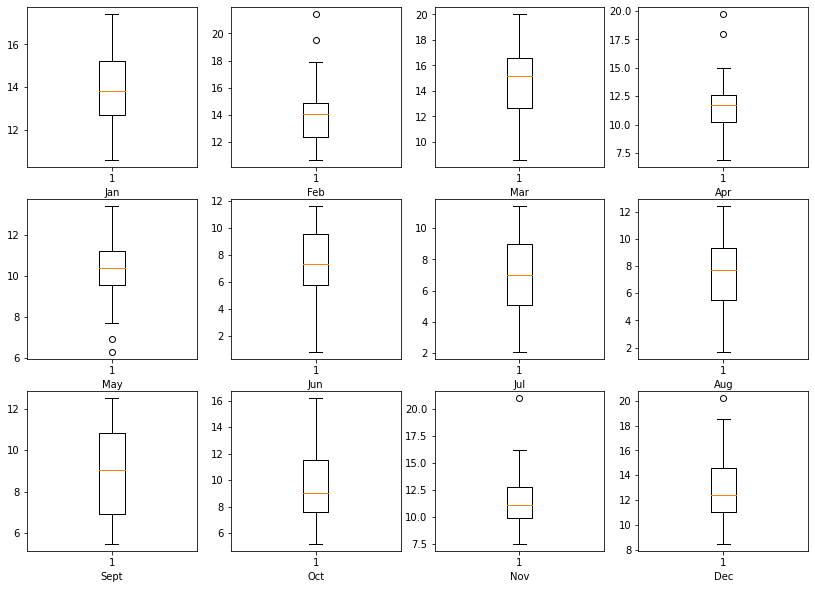

In [49]:
YearPlotsBoxPlot(1986)

Comparing box and whisker plots by consistent intervals is a useful tool. Within an interval,
it can help to spot outliers (dots above or below the whiskers). Across intervals, in this case
years, we can look for multiple year trends, seasonality, and other structural information that
could be modeled.

We may also be interested in the distribution of values across months within a year. The
example below creates 12 box and whisker plots, one for each month of 1990, the last year in the
dataset. In the example, first, only observations from 1990 are extracted. Then, the observations
are grouped by month, and each month is added to a new DataFrame as a column. Finally, a
box and whisker plot is created for each month-column in the newly constructed DataFrame.

# Exercice:

Create a Boxplot of Monthly data


Running the example creates 12 box and whisker plots, showing the signicant change
in distribution of minimum temperatures across the months of the year from the Southern
Hemisphere summer in January to the Southern Hemisphere winter in the middle of the year,
and back to summer again.

# 6. Lag Scatter Plots


Time series modeling assumes a relationship between an observation and the previous observation.
Previous observations in a time series are called lags, with the observation at the previous time

step called lag1, the observation at two time steps ago lag=2, and so on. A useful type of plot
to explore the relationship between each observation and a lag of that observation is called the
scatter plot. Pandas has a built-in function for exactly this called the lag plot. It plots the
observation at time t on the x-axis and the observation at the next time step (t+1) on the
y-axis.

* If the points cluster along a diagonal line from the bottom-left to the top-right of the plot,
it suggests a positive correlation relationship.


* If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests
a negative correlation relationship.


* Either relationship is good as they can be modeled.
More points tighter in to the diagonal line suggests a stronger relationship and more spread
from the line suggests a weaker relationship. A ball in the middle or a spread across the plot
suggests a weak or no relationship. Below is an example of a lag plot for the Minimum Daily
Temperatures dataset

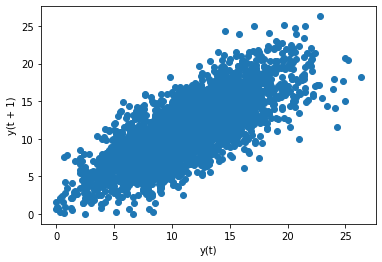

In [52]:
# create a scatter plot

from pandas.plotting import lag_plot
lag_plot(df['Temp'])


The plot created from running the example shows a relatively strong positive correlation
between observations and their lag1 values.

We can repeat this process for an observation and any lag values. Perhaps with the
observation at the same time last week, last month, or last year, or any other domain-specic
knowledge we may wish to explore. For example, we can create a scatter plot for the observation
with each value in the previous seven days. Below is an example of this for the Minimum
Daily Temperatures dataset. First, a new DataFrame is created with the lag values as new
columns. The columns are named appropriately. Then a new subplot is created that plots each
observation with a different lag value.

In [53]:
columns = [df['Temp'].values]
for i in range(1,(lags + 1)):
    columns.append(df['Temp'].values.shift(i))
    dataframe = pd.concat(columns, axis=1)
    columns = ['t']


[array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])]

# Exercice :
create multiple scatter plots (values at t vs values at t - $\tau$)


In [ ]:
Running the example suggests the strongest relationship between an observation with its
lag=1 value, but generally a good positive correlation with each value in the last week.

# Autocorrelation Plots


We can quantify the strength and type of relationship between observations and their lags. In
statistics, this is called correlation, and when calculated against lag values in time series, it is
called autocorrelation (self-correlation). A correlation value calculated between two groups of
numbers, such as observations and their lag=1 values, results in a number between -1 and 1.
The sign of this number indicates a negative or positive correlation respectively. A value close to
zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.
Correlation values, called correlation coefficients, can be calculated for each observation and
different lag values. Once calculated, a plot can be created to help better understand how this
relationship changes over the lag. This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation plot() function. The example
below creates an autocorrelation plot for the Minimum Daily Temperatures dataset:

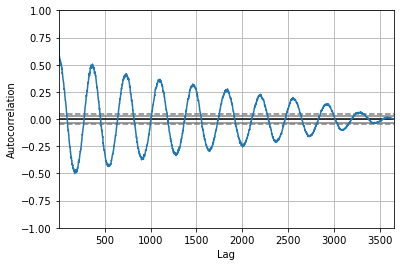

In [54]:
# create an autocorrelation plot

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Temp'])

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines
are provided that indicate any correlation values above those lines are statistically signicant
(meaningful). We can see that for the Minimum Daily Temperatures dataset we see cycles of
strong negative and positive correlation. This captures the relationship of an observation with
past observations in the same and opposite seasons or times of year. Sine waves like those seen
in this example are a strong sign of seasonality in the dataset.